
# Exploratory Data Analysis

### * EDA is to understand the data structure and data types.

### * Statistics :- Use Descriptive statistics and correlation analysis to gain deeper insights of the data.

### * Outliers :- Understanding the impact of outliers and learning techniques to handle them effectively. Such techniques are Box Plots and Z-Score analysis.

### * Data PreProcessing :- It is very important to clean data, scaling the data and normalizing data for analysis.

### * Data Visualization :- Visualize data using Histogram, Scatter plots and Box Plots to find hidden pattern in dataset.

### * Dimensionality Reduction :- PCA and t-SNE to reduce the dimensionality of the data.

### * Libraries :- Pandas, Matplotlib and Seaborn



In [124]:
# Load Libraries

import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns


In [125]:
# import data and load the data

data=pd.read_csv("/content/train_indessa.csv")
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [126]:
# .shape

# Provides number of rows and columns

data.shape

(532428, 45)

In [127]:
# Provide details about data like
# each column's data type
# total number of non-null values
# total entries

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [128]:
# calculate total number of null values in each column

data.isna().sum()

,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
batch_enrolled,85149
int_rate,0
grade,0
sub_grade,0
emp_title,30833


In [129]:
# filter out columns which has null values

null_columns=data.columns[data.isnull().any()]
null_columns

Index(['batch_enrolled', 'emp_title', 'emp_length', 'annual_inc', 'desc',
       'title', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [130]:
# Add new column to show how much % of null values exist

# create new column which has null columns with number of null values
null_data=data[null_columns].isnull().sum().to_frame(name="Null Count")
print(null_data)

# calculate the % of null values

null_data["Null Percentage"] = (null_data["Null Count"] / len(data)) * 100

# Sort columns which has highest number of null values

print("\n")

null_data=null_data.sort_values(by="Null Count",ascending=False)

print(null_data)

                             Null Count
batch_enrolled                    85149
emp_title                         30833
emp_length                        26891
annual_inc                            3
desc                             456829
title                                91
delinq_2yrs                          16
inq_last_6mths                       16
mths_since_last_delinq           272554
mths_since_last_record           450305
open_acc                             16
pub_rec                              16
revol_util                          287
total_acc                            16
collections_12_mths_ex_med           95
mths_since_last_major_derog      399448
verification_status_joint        532123
acc_now_delinq                       16
tot_coll_amt                      42004
tot_cur_bal                       42004
total_rev_hi_lim                  42004


                             Null Count  Null Percentage
verification_status_joint        532123        99.942715
desc

In [131]:
# How many rows are duplicate entries

data[data.duplicated()].shape[0]

0

In [132]:
# drop columns which has >50 % of missing values

data.drop(columns=['verification_status_joint','desc','mths_since_last_record',\
                    'mths_since_last_major_derog','mths_since_last_delinq'],
                    axis=1,inplace=True)


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   member_id                   532428 non-null  int64  
 1   loan_amnt                   532428 non-null  int64  
 2   funded_amnt                 532428 non-null  int64  
 3   funded_amnt_inv             532428 non-null  float64
 4   term                        532428 non-null  object 
 5   batch_enrolled              447279 non-null  object 
 6   int_rate                    532428 non-null  float64
 7   grade                       532428 non-null  object 
 8   sub_grade                   532428 non-null  object 
 9   emp_title                   501595 non-null  object 
 10  emp_length                  505537 non-null  object 
 11  home_ownership              532428 non-null  object 
 12  annual_inc                  532425 non-null  float64
 13  verification_s

In [134]:
#sub data_frame
data_new = data[['funded_amnt_inv', 'term', 'int_rate', 'emp_length', 'emp_title', 'annual_inc',
             'verification_status', 'purpose', 'addr_state', 'dti', 'initial_list_status',
             'total_rec_int', 'total_rec_late_fee', 'application_type', 'tot_coll_amt',
             'tot_cur_bal', 'loan_status']].rename(columns={
    'funded_amnt_inv': 'BANK_INVESTMENT',
    'term': 'TERM',
    'int_rate': 'INTEREST_RATE',
    'emp_length': 'EMPLOYEMENT_DURATION',
    'emp_title': 'EMPPLOYMENT_TITLE',
    'annual_inc': 'ANNUAL_INCOME',
    'verification_status': 'STATUS',
    'purpose': 'LOAN_PURPOSE',
    'addr_state': 'STATE',
    'dti': 'DTI',
    'initial_list_status': 'INITIAL_LIST_STATUS',
    'total_rec_int': 'RECEIVED_INTEREST_TOTAL',
    'total_rec_late_fee': 'RECEIVED_LATE_FEE',
    'application_type': 'APPLICATION_TYPE',
    'tot_coll_amt': 'TOTAL_COLLECTION_AMOUNT',
    'tot_cur_bal': 'TOTAL_CURRENT_BALANCE',
    'loan_status': 'LOAN_STATUS'
})


In [135]:
# create new csv files to save features that are important for analysis

data_new.to_csv("EDA_data.csv",index=False)

In [136]:
data=pd.read_csv("/content/EDA_data.csv")
data.head()

,BANK_INVESTMENT,TERM,INTEREST_RATE,EMPLOYEMENT_DURATION,EMPPLOYMENT_TITLE,ANNUAL_INCOME,STATUS,LOAN_PURPOSE,STATE,DTI,INITIAL_LIST_STATUS,RECEIVED_INTEREST_TOTAL,RECEIVED_LATE_FEE,APPLICATION_TYPE,TOTAL_COLLECTION_AMOUNT,TOTAL_CURRENT_BALANCE,LOAN_STATUS
0,14350.0,36 months,19.19,9 years,clerk,28700.0,Source Verified,debt_consolidation,FL,33.88,f,1173.84,0.0,INDIVIDUAL,0.0,28699.0,0
1,4800.0,36 months,10.99,< 1 year,Human Resources Specialist,65000.0,Source Verified,home_improvement,MD,3.64,w,83.95,0.0,INDIVIDUAL,0.0,9974.0,0
2,10000.0,36 months,7.26,2 years,Driver,45000.0,Not Verified,debt_consolidation,OH,18.42,w,56.47,0.0,INDIVIDUAL,65.0,38295.0,0
3,15000.0,36 months,19.72,10+ years,Us office of Personnel Management,105000.0,Not Verified,debt_consolidation,VA,14.97,f,4858.62,0.0,INDIVIDUAL,0.0,55564.0,0
4,16000.0,36 months,10.64,10+ years,LAUSD-HOLLYWOOD HIGH SCHOOL,52000.0,Verified,credit_card,CA,20.16,w,2296.41,0.0,INDIVIDUAL,0.0,47159.0,0


In [137]:
print(data.shape)

print("\n")

print(data.info())

(532428, 17)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BANK_INVESTMENT          532428 non-null  float64
 1   TERM                     532428 non-null  object 
 2   INTEREST_RATE            532428 non-null  float64
 3   EMPLOYEMENT_DURATION     505537 non-null  object 
 4   EMPPLOYMENT_TITLE        501595 non-null  object 
 5   ANNUAL_INCOME            532425 non-null  float64
 6   STATUS                   532428 non-null  object 
 7   LOAN_PURPOSE             532428 non-null  object 
 8   STATE                    532428 non-null  object 
 9   DTI                      532428 non-null  float64
 10  INITIAL_LIST_STATUS      532428 non-null  object 
 11  RECEIVED_INTEREST_TOTAL  532428 non-null  float64
 12  RECEIVED_LATE_FEE        532428 non-null  float64
 13  APPLICATION_TYPE         532428 non-null  ob

In [138]:
# filter out null values again

null_columns = data.columns[data.isnull().any()]

print(null_columns)

null_data=data[null_columns].isnull().sum().to_frame("Null Counts")
print(null_data)

# calculate % of null values

print("\n")

null_data['Null Percentage']=(null_data['Null Counts']/len(data))*100
print(null_data)

print("\n")

null_data=null_data.sort_values(by="Null Counts",ascending=False)
print(null_data)

Index(['EMPLOYEMENT_DURATION', 'EMPPLOYMENT_TITLE', 'ANNUAL_INCOME',
       'TOTAL_COLLECTION_AMOUNT', 'TOTAL_CURRENT_BALANCE'],
      dtype='object')
                         Null Counts
EMPLOYEMENT_DURATION           26891
EMPPLOYMENT_TITLE              30833
ANNUAL_INCOME                      3
TOTAL_COLLECTION_AMOUNT        42004
TOTAL_CURRENT_BALANCE          42004


                         Null Counts  Null Percentage
EMPLOYEMENT_DURATION           26891         5.050636
EMPPLOYMENT_TITLE              30833         5.791018
ANNUAL_INCOME                      3         0.000563
TOTAL_COLLECTION_AMOUNT        42004         7.889142
TOTAL_CURRENT_BALANCE          42004         7.889142


                         Null Counts  Null Percentage
TOTAL_CURRENT_BALANCE          42004         7.889142
TOTAL_COLLECTION_AMOUNT        42004         7.889142
EMPPLOYMENT_TITLE              30833         5.791018
EMPLOYEMENT_DURATION           26891         5.050636
ANNUAL_INCOME                

In [139]:
# find out unique entries in column

unique_entries= pd.Series(data['EMPPLOYMENT_TITLE'].value_counts()).sort_values(ascending=False)
unique_entries

,count
EMPPLOYMENT_TITLE,
Teacher,8280
Manager,6922
Registered Nurse,3387
Owner,3305
RN,3255
...,...
swing shift cnc leadman/cnc programer,1
SR. Accountant,1
Sandoz Inc.,1


In [140]:
# one hot encoding is not possible for this column because it has so many unique
# values so we can drop it.

data.drop("EMPPLOYMENT_TITLE",axis=1,inplace=True)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BANK_INVESTMENT          532428 non-null  float64
 1   TERM                     532428 non-null  object 
 2   INTEREST_RATE            532428 non-null  float64
 3   EMPLOYEMENT_DURATION     505537 non-null  object 
 4   ANNUAL_INCOME            532425 non-null  float64
 5   STATUS                   532428 non-null  object 
 6   LOAN_PURPOSE             532428 non-null  object 
 7   STATE                    532428 non-null  object 
 8   DTI                      532428 non-null  float64
 9   INITIAL_LIST_STATUS      532428 non-null  object 
 10  RECEIVED_INTEREST_TOTAL  532428 non-null  float64
 11  RECEIVED_LATE_FEE        532428 non-null  float64
 12  APPLICATION_TYPE         532428 non-null  object 
 13  TOTAL_COLLECTION_AMOUNT  490424 non-null  float64
 14  TOTA

In [142]:
data.head(10)

,BANK_INVESTMENT,TERM,INTEREST_RATE,EMPLOYEMENT_DURATION,ANNUAL_INCOME,STATUS,LOAN_PURPOSE,STATE,DTI,INITIAL_LIST_STATUS,RECEIVED_INTEREST_TOTAL,RECEIVED_LATE_FEE,APPLICATION_TYPE,TOTAL_COLLECTION_AMOUNT,TOTAL_CURRENT_BALANCE,LOAN_STATUS
0,14350.0,36 months,19.19,9 years,28700.0,Source Verified,debt_consolidation,FL,33.88,f,1173.84,0.0,INDIVIDUAL,0.0,28699.0,0
1,4800.0,36 months,10.99,< 1 year,65000.0,Source Verified,home_improvement,MD,3.64,w,83.95,0.0,INDIVIDUAL,0.0,9974.0,0
2,10000.0,36 months,7.26,2 years,45000.0,Not Verified,debt_consolidation,OH,18.42,w,56.47,0.0,INDIVIDUAL,65.0,38295.0,0
3,15000.0,36 months,19.72,10+ years,105000.0,Not Verified,debt_consolidation,VA,14.97,f,4858.62,0.0,INDIVIDUAL,0.0,55564.0,0
4,16000.0,36 months,10.64,10+ years,52000.0,Verified,credit_card,CA,20.16,w,2296.41,0.0,INDIVIDUAL,0.0,47159.0,0
5,14950.0,36 months,8.90,2 years,120000.0,Not Verified,debt_consolidation,IN,12.30,f,1957.24,0.0,INDIVIDUAL,0.0,350619.0,0
6,4975.0,36 months,7.90,5 years,75000.0,Source Verified,debt_consolidation,CA,5.70,f,578.36,0.0,INDIVIDUAL,1023.0,13272.0,1
7,6000.0,36 months,9.17,8 years,54000.0,Not Verified,credit_card,AL,11.63,f,637.51,0.0,INDIVIDUAL,0.0,272579.0,0
8,6000.0,36 months,13.99,7 years,92000.0,Not Verified,home_improvement,CA,30.85,w,621.72,0.0,INDIVIDUAL,0.0,281521.0,0
9,34550.0,60 months,17.14,2 years,72000.0,Verified,debt_consolidation,KY,33.92,w,5535.46,0.0,INDIVIDUAL,0.0,76034.0,0


In [143]:
# Remove additional details from "TERM" and "EMPLOYMENT_DURATION" columns

data['TERM']=data['TERM'].str.replace("months", " ")

data['TERM']= data['TERM'].astype(int)


In [144]:
data.head()

,BANK_INVESTMENT,TERM,INTEREST_RATE,EMPLOYEMENT_DURATION,ANNUAL_INCOME,STATUS,LOAN_PURPOSE,STATE,DTI,INITIAL_LIST_STATUS,RECEIVED_INTEREST_TOTAL,RECEIVED_LATE_FEE,APPLICATION_TYPE,TOTAL_COLLECTION_AMOUNT,TOTAL_CURRENT_BALANCE,LOAN_STATUS
0,14350.0,36,19.19,9 years,28700.0,Source Verified,debt_consolidation,FL,33.88,f,1173.84,0.0,INDIVIDUAL,0.0,28699.0,0
1,4800.0,36,10.99,< 1 year,65000.0,Source Verified,home_improvement,MD,3.64,w,83.95,0.0,INDIVIDUAL,0.0,9974.0,0
2,10000.0,36,7.26,2 years,45000.0,Not Verified,debt_consolidation,OH,18.42,w,56.47,0.0,INDIVIDUAL,65.0,38295.0,0
3,15000.0,36,19.72,10+ years,105000.0,Not Verified,debt_consolidation,VA,14.97,f,4858.62,0.0,INDIVIDUAL,0.0,55564.0,0
4,16000.0,36,10.64,10+ years,52000.0,Verified,credit_card,CA,20.16,w,2296.41,0.0,INDIVIDUAL,0.0,47159.0,0


In [145]:
data['EMPLOYEMENT_DURATION']=data['EMPLOYEMENT_DURATION'].str.replace("years","")

data['EMPLOYEMENT_DURATION']=data['EMPLOYEMENT_DURATION'].str.replace("year","")

# consider 10 as 10+ years
data['EMPLOYEMENT_DURATION']=data['EMPLOYEMENT_DURATION'].str.replace("+","")

# 0 means less than a year
data['EMPLOYEMENT_DURATION']=data['EMPLOYEMENT_DURATION'].str.replace('< 1',"0")

data['EMPLOYEMENT_DURATION']=data['EMPLOYEMENT_DURATION'].fillna("-1")

data['EMPLOYEMENT_DURATION']=data['EMPLOYEMENT_DURATION'].astype(int)

In [146]:
data.head(10)

,BANK_INVESTMENT,TERM,INTEREST_RATE,EMPLOYEMENT_DURATION,ANNUAL_INCOME,STATUS,LOAN_PURPOSE,STATE,DTI,INITIAL_LIST_STATUS,RECEIVED_INTEREST_TOTAL,RECEIVED_LATE_FEE,APPLICATION_TYPE,TOTAL_COLLECTION_AMOUNT,TOTAL_CURRENT_BALANCE,LOAN_STATUS
0,14350.0,36,19.19,9,28700.0,Source Verified,debt_consolidation,FL,33.88,f,1173.84,0.0,INDIVIDUAL,0.0,28699.0,0
1,4800.0,36,10.99,0,65000.0,Source Verified,home_improvement,MD,3.64,w,83.95,0.0,INDIVIDUAL,0.0,9974.0,0
2,10000.0,36,7.26,2,45000.0,Not Verified,debt_consolidation,OH,18.42,w,56.47,0.0,INDIVIDUAL,65.0,38295.0,0
3,15000.0,36,19.72,10,105000.0,Not Verified,debt_consolidation,VA,14.97,f,4858.62,0.0,INDIVIDUAL,0.0,55564.0,0
4,16000.0,36,10.64,10,52000.0,Verified,credit_card,CA,20.16,w,2296.41,0.0,INDIVIDUAL,0.0,47159.0,0
5,14950.0,36,8.90,2,120000.0,Not Verified,debt_consolidation,IN,12.30,f,1957.24,0.0,INDIVIDUAL,0.0,350619.0,0
6,4975.0,36,7.90,5,75000.0,Source Verified,debt_consolidation,CA,5.70,f,578.36,0.0,INDIVIDUAL,1023.0,13272.0,1
7,6000.0,36,9.17,8,54000.0,Not Verified,credit_card,AL,11.63,f,637.51,0.0,INDIVIDUAL,0.0,272579.0,0
8,6000.0,36,13.99,7,92000.0,Not Verified,home_improvement,CA,30.85,w,621.72,0.0,INDIVIDUAL,0.0,281521.0,0
9,34550.0,60,17.14,2,72000.0,Verified,debt_consolidation,KY,33.92,w,5535.46,0.0,INDIVIDUAL,0.0,76034.0,0


In [147]:
LOAN_DATA=data['LOAN_STATUS'].value_counts().to_frame("Total LOAN Count")
print(LOAN_DATA)

LOAN_DATA['LOAN_PERCENTAGE']=(LOAN_DATA['Total LOAN Count']/len(data))*100
print(LOAN_DATA)

             Total LOAN Count
LOAN_STATUS                  
0                      406601
1                      125827
             Total LOAN Count  LOAN_PERCENTAGE
LOAN_STATUS                                   
0                      406601        76.367321
1                      125827        23.632679


In [148]:
# Save the data again in CSV file

data.to_csv("EDA_ready_data.csv",index=False)

In [149]:
# check null values

null_columns=data.columns[data.isnull().any()]
print(null_columns)

print("\n")

null_data=data[null_columns].isnull().sum().to_frame("Null Count")
print(null_data)

print("\n")
null_data['Null Percentage']=(null_data['Null Count']/len(data))*100
print(null_data)

# Sort the values

print("\n")

null_data=null_data.sort_values(by="Null Count",ascending=False)
print(null_data)

Index(['ANNUAL_INCOME', 'TOTAL_COLLECTION_AMOUNT', 'TOTAL_CURRENT_BALANCE'], dtype='object')


                         Null Count
ANNUAL_INCOME                     3
TOTAL_COLLECTION_AMOUNT       42004
TOTAL_CURRENT_BALANCE         42004


                         Null Count  Null Percentage
ANNUAL_INCOME                     3         0.000563
TOTAL_COLLECTION_AMOUNT       42004         7.889142
TOTAL_CURRENT_BALANCE         42004         7.889142


                         Null Count  Null Percentage
TOTAL_COLLECTION_AMOUNT       42004         7.889142
TOTAL_CURRENT_BALANCE         42004         7.889142
ANNUAL_INCOME                     3         0.000563


In [150]:
data.shape

(532428, 16)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BANK_INVESTMENT          532428 non-null  float64
 1   TERM                     532428 non-null  int64  
 2   INTEREST_RATE            532428 non-null  float64
 3   EMPLOYEMENT_DURATION     532428 non-null  int64  
 4   ANNUAL_INCOME            532425 non-null  float64
 5   STATUS                   532428 non-null  object 
 6   LOAN_PURPOSE             532428 non-null  object 
 7   STATE                    532428 non-null  object 
 8   DTI                      532428 non-null  float64
 9   INITIAL_LIST_STATUS      532428 non-null  object 
 10  RECEIVED_INTEREST_TOTAL  532428 non-null  float64
 11  RECEIVED_LATE_FEE        532428 non-null  float64
 12  APPLICATION_TYPE         532428 non-null  object 
 13  TOTAL_COLLECTION_AMOUNT  490424 non-null  float64
 14  TOTA

In [152]:
# seperate categorical columns

categorical_columns=data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['STATUS', 'LOAN_PURPOSE', 'STATE', 'INITIAL_LIST_STATUS', 'APPLICATION_TYPE']

In [153]:
# seperate numerical columns

numerical_columns=data.select_dtypes(include=np.number).columns.tolist()
numerical_columns

['BANK_INVESTMENT',
 'TERM',
 'INTEREST_RATE',
 'EMPLOYEMENT_DURATION',
 'ANNUAL_INCOME',
 'DTI',
 'RECEIVED_INTEREST_TOTAL',
 'RECEIVED_LATE_FEE',
 'TOTAL_COLLECTION_AMOUNT',
 'TOTAL_CURRENT_BALANCE',
 'LOAN_STATUS']

In [154]:
# Descriptive statistical summary of only numerical columns
data[numerical_columns].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
BANK_INVESTMENT,532428.0,14704.926696,8441.290381,0.00,8000.00,13000.00,20000.000,35000.00
TERM,532428.0,43.195790,10.996354,36.00,36.00,36.00,60.000,60.00
INTEREST_RATE,532428.0,13.242969,4.379611,5.32,9.99,12.99,16.200,28.99
EMPLOYEMENT_DURATION,532428.0,5.656481,3.887653,-1.00,2.00,6.00,10.000,10.00
ANNUAL_INCOME,532425.0,75029.843289,65199.845014,1200.00,45000.00,65000.00,90000.000,9500000.00
DTI,532428.0,18.138767,8.369074,0.00,11.93,17.65,23.950,672.52
RECEIVED_INTEREST_TOTAL,532428.0,1753.428788,2093.199837,0.00,441.60,1072.69,2234.735,24205.62
RECEIVED_LATE_FEE,532428.0,0.394954,4.091546,0.00,0.00,0.00,0.000,358.68
TOTAL_COLLECTION_AMOUNT,490424.0,213.562222,1958.571538,0.00,0.00,0.00,0.000,496651.00
TOTAL_CURRENT_BALANCE,490424.0,139554.110792,153914.877437,0.00,29839.75,80669.50,208479.250,8000078.00


In [155]:
null_data

,Null Count,Null Percentage
TOTAL_COLLECTION_AMOUNT,42004,7.889142
TOTAL_CURRENT_BALANCE,42004,7.889142
ANNUAL_INCOME,3,0.000563


In [156]:
# Imputation of missing values
data[['ANNUAL_INCOME', 'TOTAL_COLLECTION_AMOUNT', 'TOTAL_CURRENT_BALANCE']].mean()

,0
ANNUAL_INCOME,75029.843289
TOTAL_COLLECTION_AMOUNT,213.562222
TOTAL_CURRENT_BALANCE,139554.110792


In [157]:
# TOTAL_CURRENT_BALANCE & ANNUAL_INCOME has higher mean amount. Since the bank
# is dealing with the default situation, it may not be wise to replace it with
# the average values.
# In this case, we can use the minimum value of both columns.

In [158]:
# replace ANNUAL_INCOME & TOTAL_CURRENT_BALANCE with minimum values

data['TOTAL_CURRENT_BALANCE'].fillna(data['TOTAL_CURRENT_BALANCE'].min(),inplace=True)

data['ANNUAL_INCOME'].fillna(data['TOTAL_CURRENT_BALANCE'].min(),inplace=True)

/tmp/ipython-input-3343714400.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TOTAL_CURRENT_BALANCE'].fillna(data['TOTAL_CURRENT_BALANCE'].min(),inplace=True)
/tmp/ipython-input-3343714400.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [159]:
# replace null values of TOTAL_COLLECTION_AMOUNT using mean of that column

data['TOTAL_COLLECTION_AMOUNT'].fillna(data['TOTAL_COLLECTION_AMOUNT'].mean(),inplace=True)

/tmp/ipython-input-2513618408.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TOTAL_COLLECTION_AMOUNT'].fillna(data['TOTAL_COLLECTION_AMOUNT'].mean(),inplace=True)


In [160]:
data.isnull().sum()

,0
BANK_INVESTMENT,0
TERM,0
INTEREST_RATE,0
EMPLOYEMENT_DURATION,0
ANNUAL_INCOME,0
STATUS,0
LOAN_PURPOSE,0
STATE,0
DTI,0
INITIAL_LIST_STATUS,0


# Summary of Descriptive statistics

### * The average interest rate is 13.24%, with minimum rate 5.32% and maximum rate 28.99%

### * The average income of loan borrower is ~$75,000 , with minimum annual income $1200 and maximum annual income $9,500,000.

### * The average debt to income ratio(DTI) is 18.13, with minimum ratio 0 and maximum 672.52.

### * most of the loan given for 36 months, with total count of 5,32,428 loans.

# Univariate Analysis

### * Univariate analysis focuses on analysing the distribution and properties of a  particular variable within a dataset.

### * The process examines the variable's frequency distribution, computing descriptive statistics including mean, mode, standard deviation, minimum and maximum values and visualising the data using histograms, box plot and density plots.

### * The Univariate analysis seeks to undestand the distribution of the data and its range of values by locating outliers , missing values and abonormalities in the data.

In [161]:
categorical_columns,\
numerical_columns

(['STATUS',
  'LOAN_PURPOSE',
  'STATE',
  'INITIAL_LIST_STATUS',
  'APPLICATION_TYPE'],
 ['BANK_INVESTMENT',
  'TERM',
  'INTEREST_RATE',
  'EMPLOYEMENT_DURATION',
  'ANNUAL_INCOME',
  'DTI',
  'RECEIVED_INTEREST_TOTAL',
  'RECEIVED_LATE_FEE',
  'TOTAL_COLLECTION_AMOUNT',
  'TOTAL_CURRENT_BALANCE',
  'LOAN_STATUS'])

Text(0.5, 1.0, 'Boxplot of BANK_INVESTMENT')

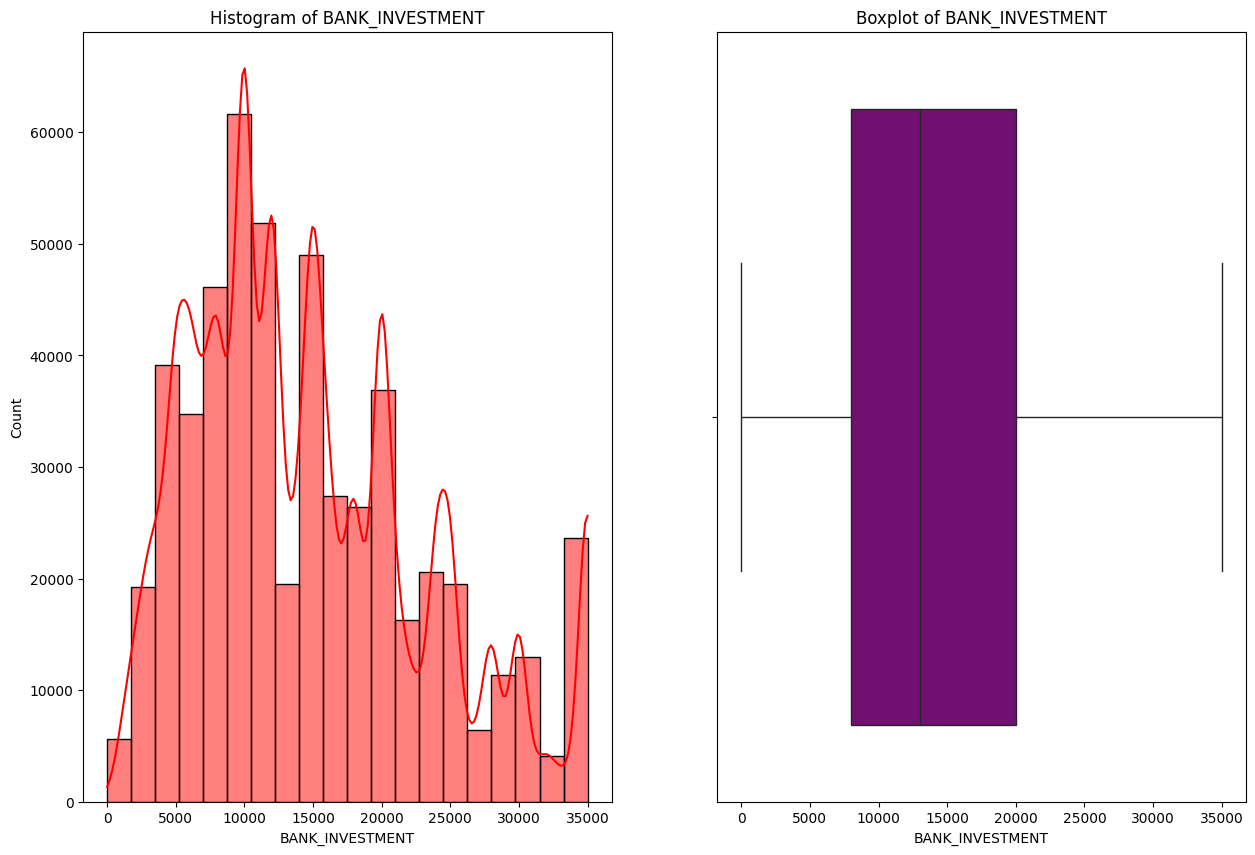

In [162]:
# Histogram and Box Plot

fig,axs=plt.subplots(ncols=2,figsize=(15,10))

sns.histplot(data,x='BANK_INVESTMENT',bins=20,color="red",kde=True,ax=axs[0])

axs[0].set_title("Histogram of BANK_INVESTMENT")

sns.boxplot(data,x="BANK_INVESTMENT",color="purple",ax=axs[1])

axs[1].set_title("Boxplot of BANK_INVESTMENT")

Text(0.5, 1.0, 'Boxplot of INTEREST_RATE')

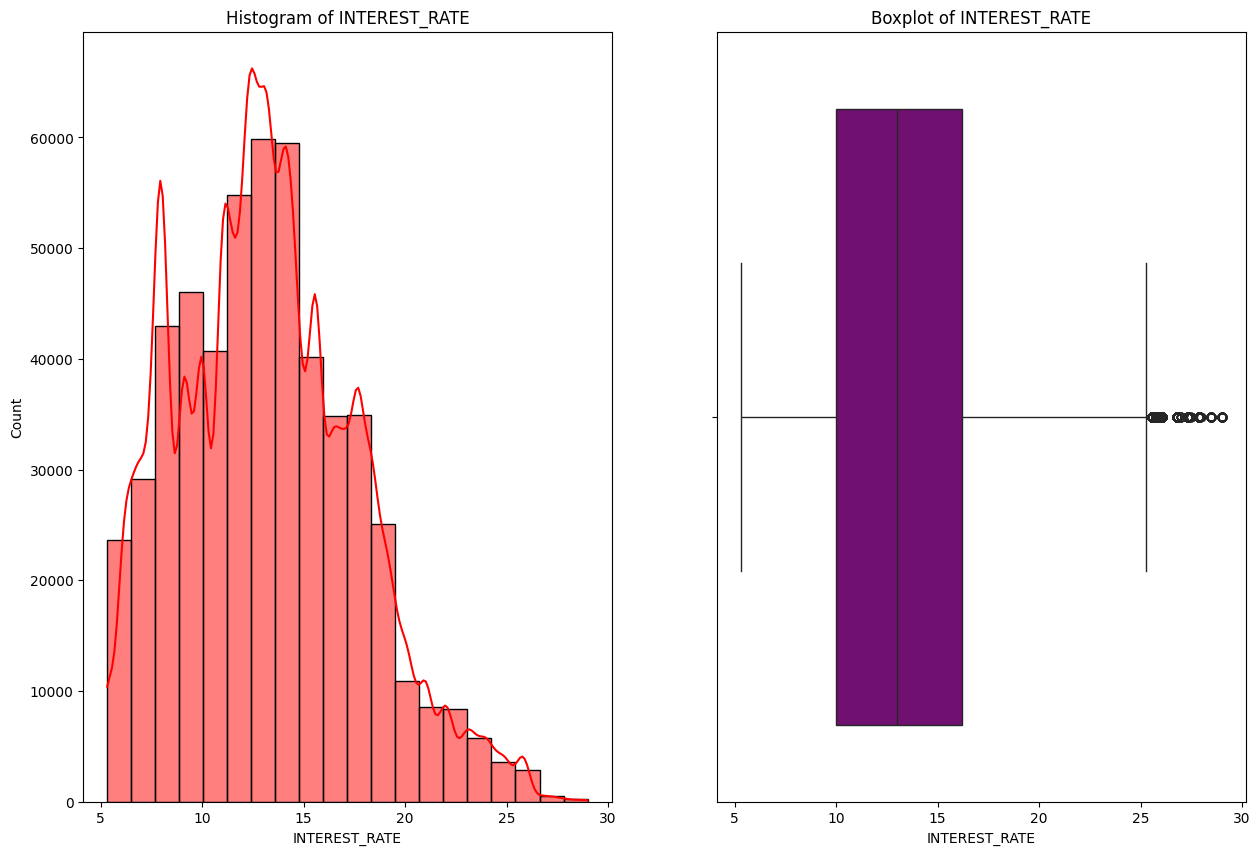

In [163]:
# Histogram and Box Plot

fig,axs=plt.subplots(ncols=2,figsize=(15,10))

sns.histplot(data,x='INTEREST_RATE',bins=20,color="red",kde=True,ax=axs[0])

axs[0].set_title("Histogram of INTEREST_RATE")

sns.boxplot(data,x="INTEREST_RATE",color="purple",ax=axs[1])

axs[1].set_title("Boxplot of INTEREST_RATE")

In [164]:
categorical_columns

['STATUS', 'LOAN_PURPOSE', 'STATE', 'INITIAL_LIST_STATUS', 'APPLICATION_TYPE']

<Axes: xlabel='INITIAL_LIST_STATUS', ylabel='count'>

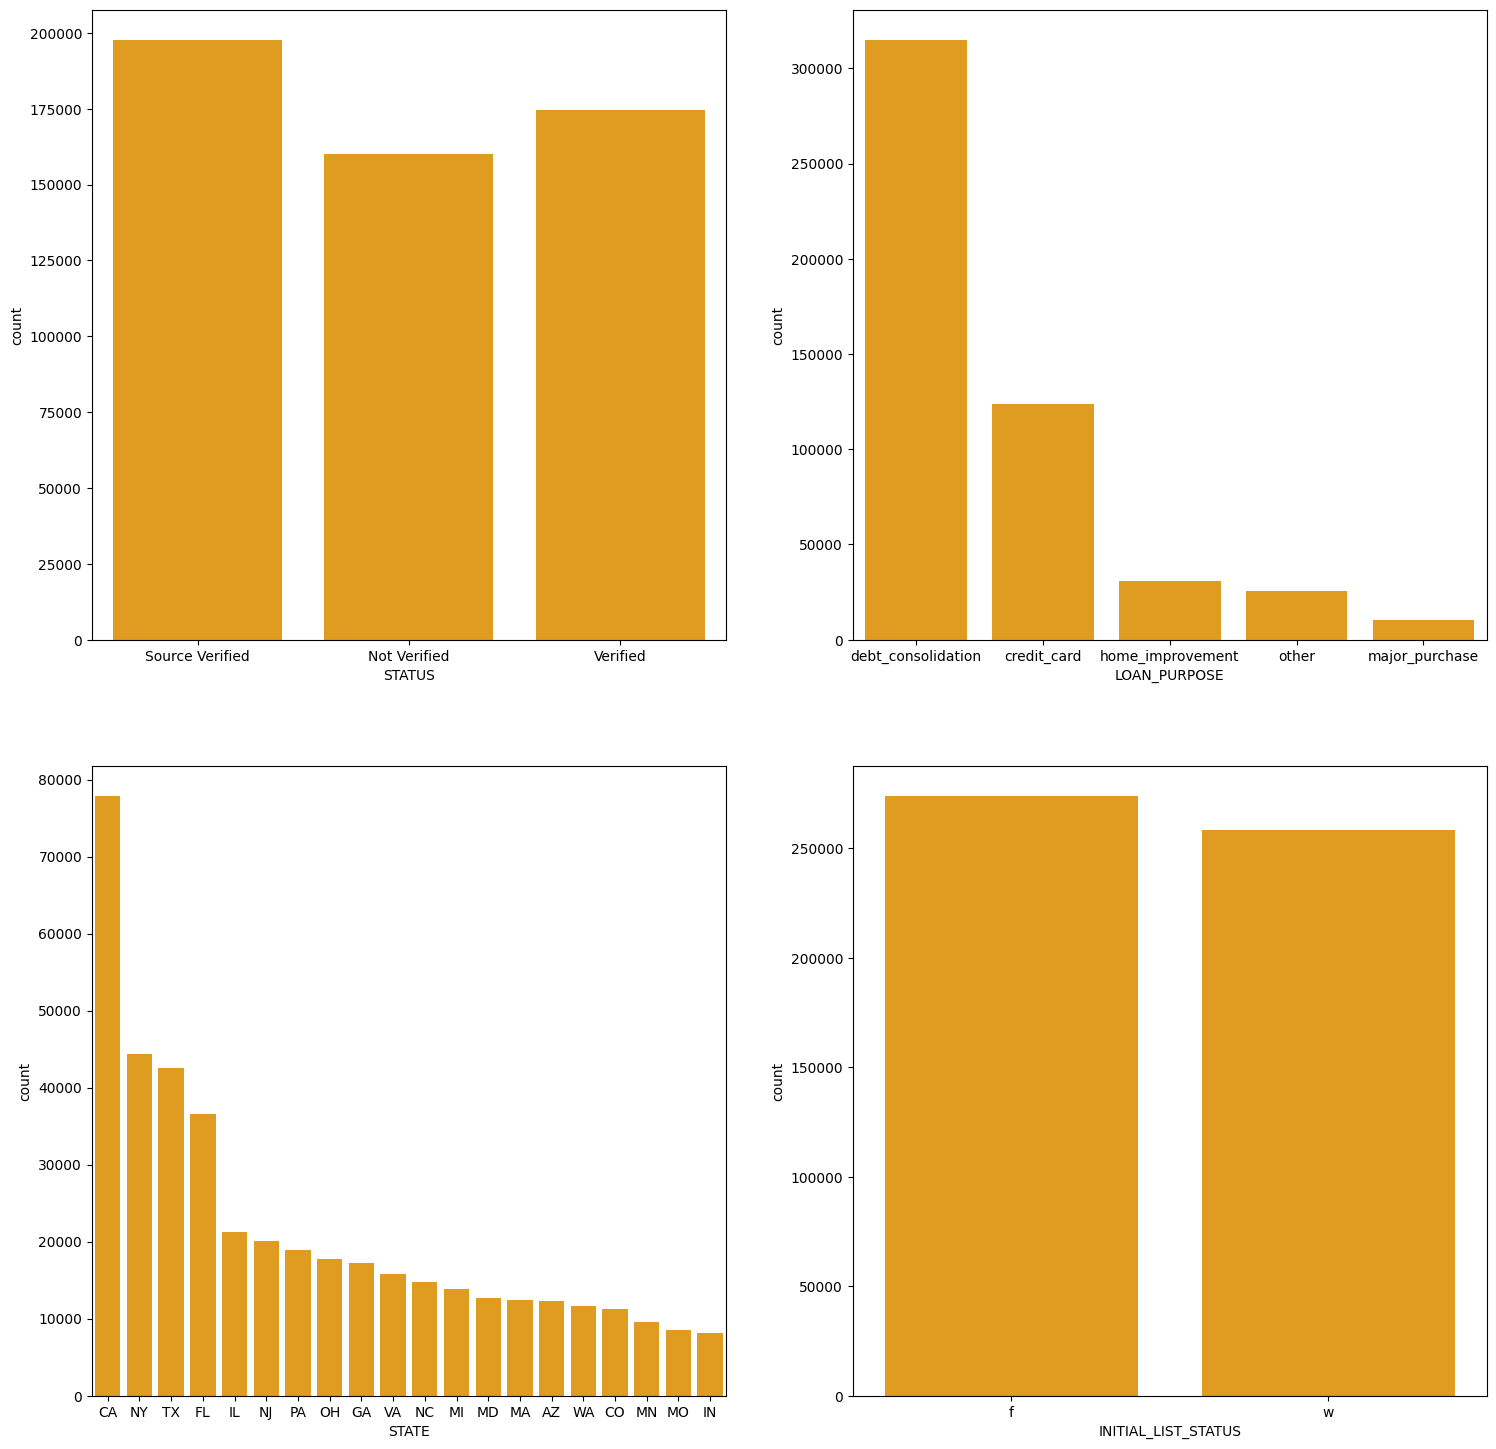

In [165]:
# Barplot of all categorical columns

fig,axes = plt.subplots(2,2,figsize=(18,18))

sns.countplot(ax=axes[0,0],x="STATUS",data=data,color="orange")

# all the loan purpose reason will not fit in graph so only selected 5
sns.countplot(ax=axes[0,1],x="LOAN_PURPOSE",data=data,color="orange",
              order=data['LOAN_PURPOSE'].value_counts().index[:5])

sns.countplot(ax=axes[1,0],x="STATE",data=data,color="orange",
              order=data['STATE'].value_counts().index[:20])

sns.countplot(ax=axes[1,1],x="INITIAL_LIST_STATUS",data=data,color="orange")

# Observation :-

### * almost one third of the loans were not verified.

### * The main reason for giving loan is Debt Consolidation.

### * California is the state which takes highest number of loans from bank.

# Bivariate Analysis

### * Bivariate Analysis is statistical tenchnique used in EDA to make sure whether there is a link between two variables.

### * It includes examining two variables at once to look for any patterns or relationships.

### * Finding out how much one variable affects another if the two variabe are connected, and if so, how strong that relationship is, may all be done using bivariate analysis.

### * The scatter plot, which is the most popular method for bivariate analysis, may be used to check the association between two variables.

### * Correlation analysis , the chi-square test and t- test and analysis of variance are method utilised in bivariate analysis.

### * Understanding link between two variables and how one variable affects the other is the major goal of bivariate analysis.



In [166]:
numerical_columns

['BANK_INVESTMENT',
 'TERM',
 'INTEREST_RATE',
 'EMPLOYEMENT_DURATION',
 'ANNUAL_INCOME',
 'DTI',
 'RECEIVED_INTEREST_TOTAL',
 'RECEIVED_LATE_FEE',
 'TOTAL_COLLECTION_AMOUNT',
 'TOTAL_CURRENT_BALANCE',
 'LOAN_STATUS']

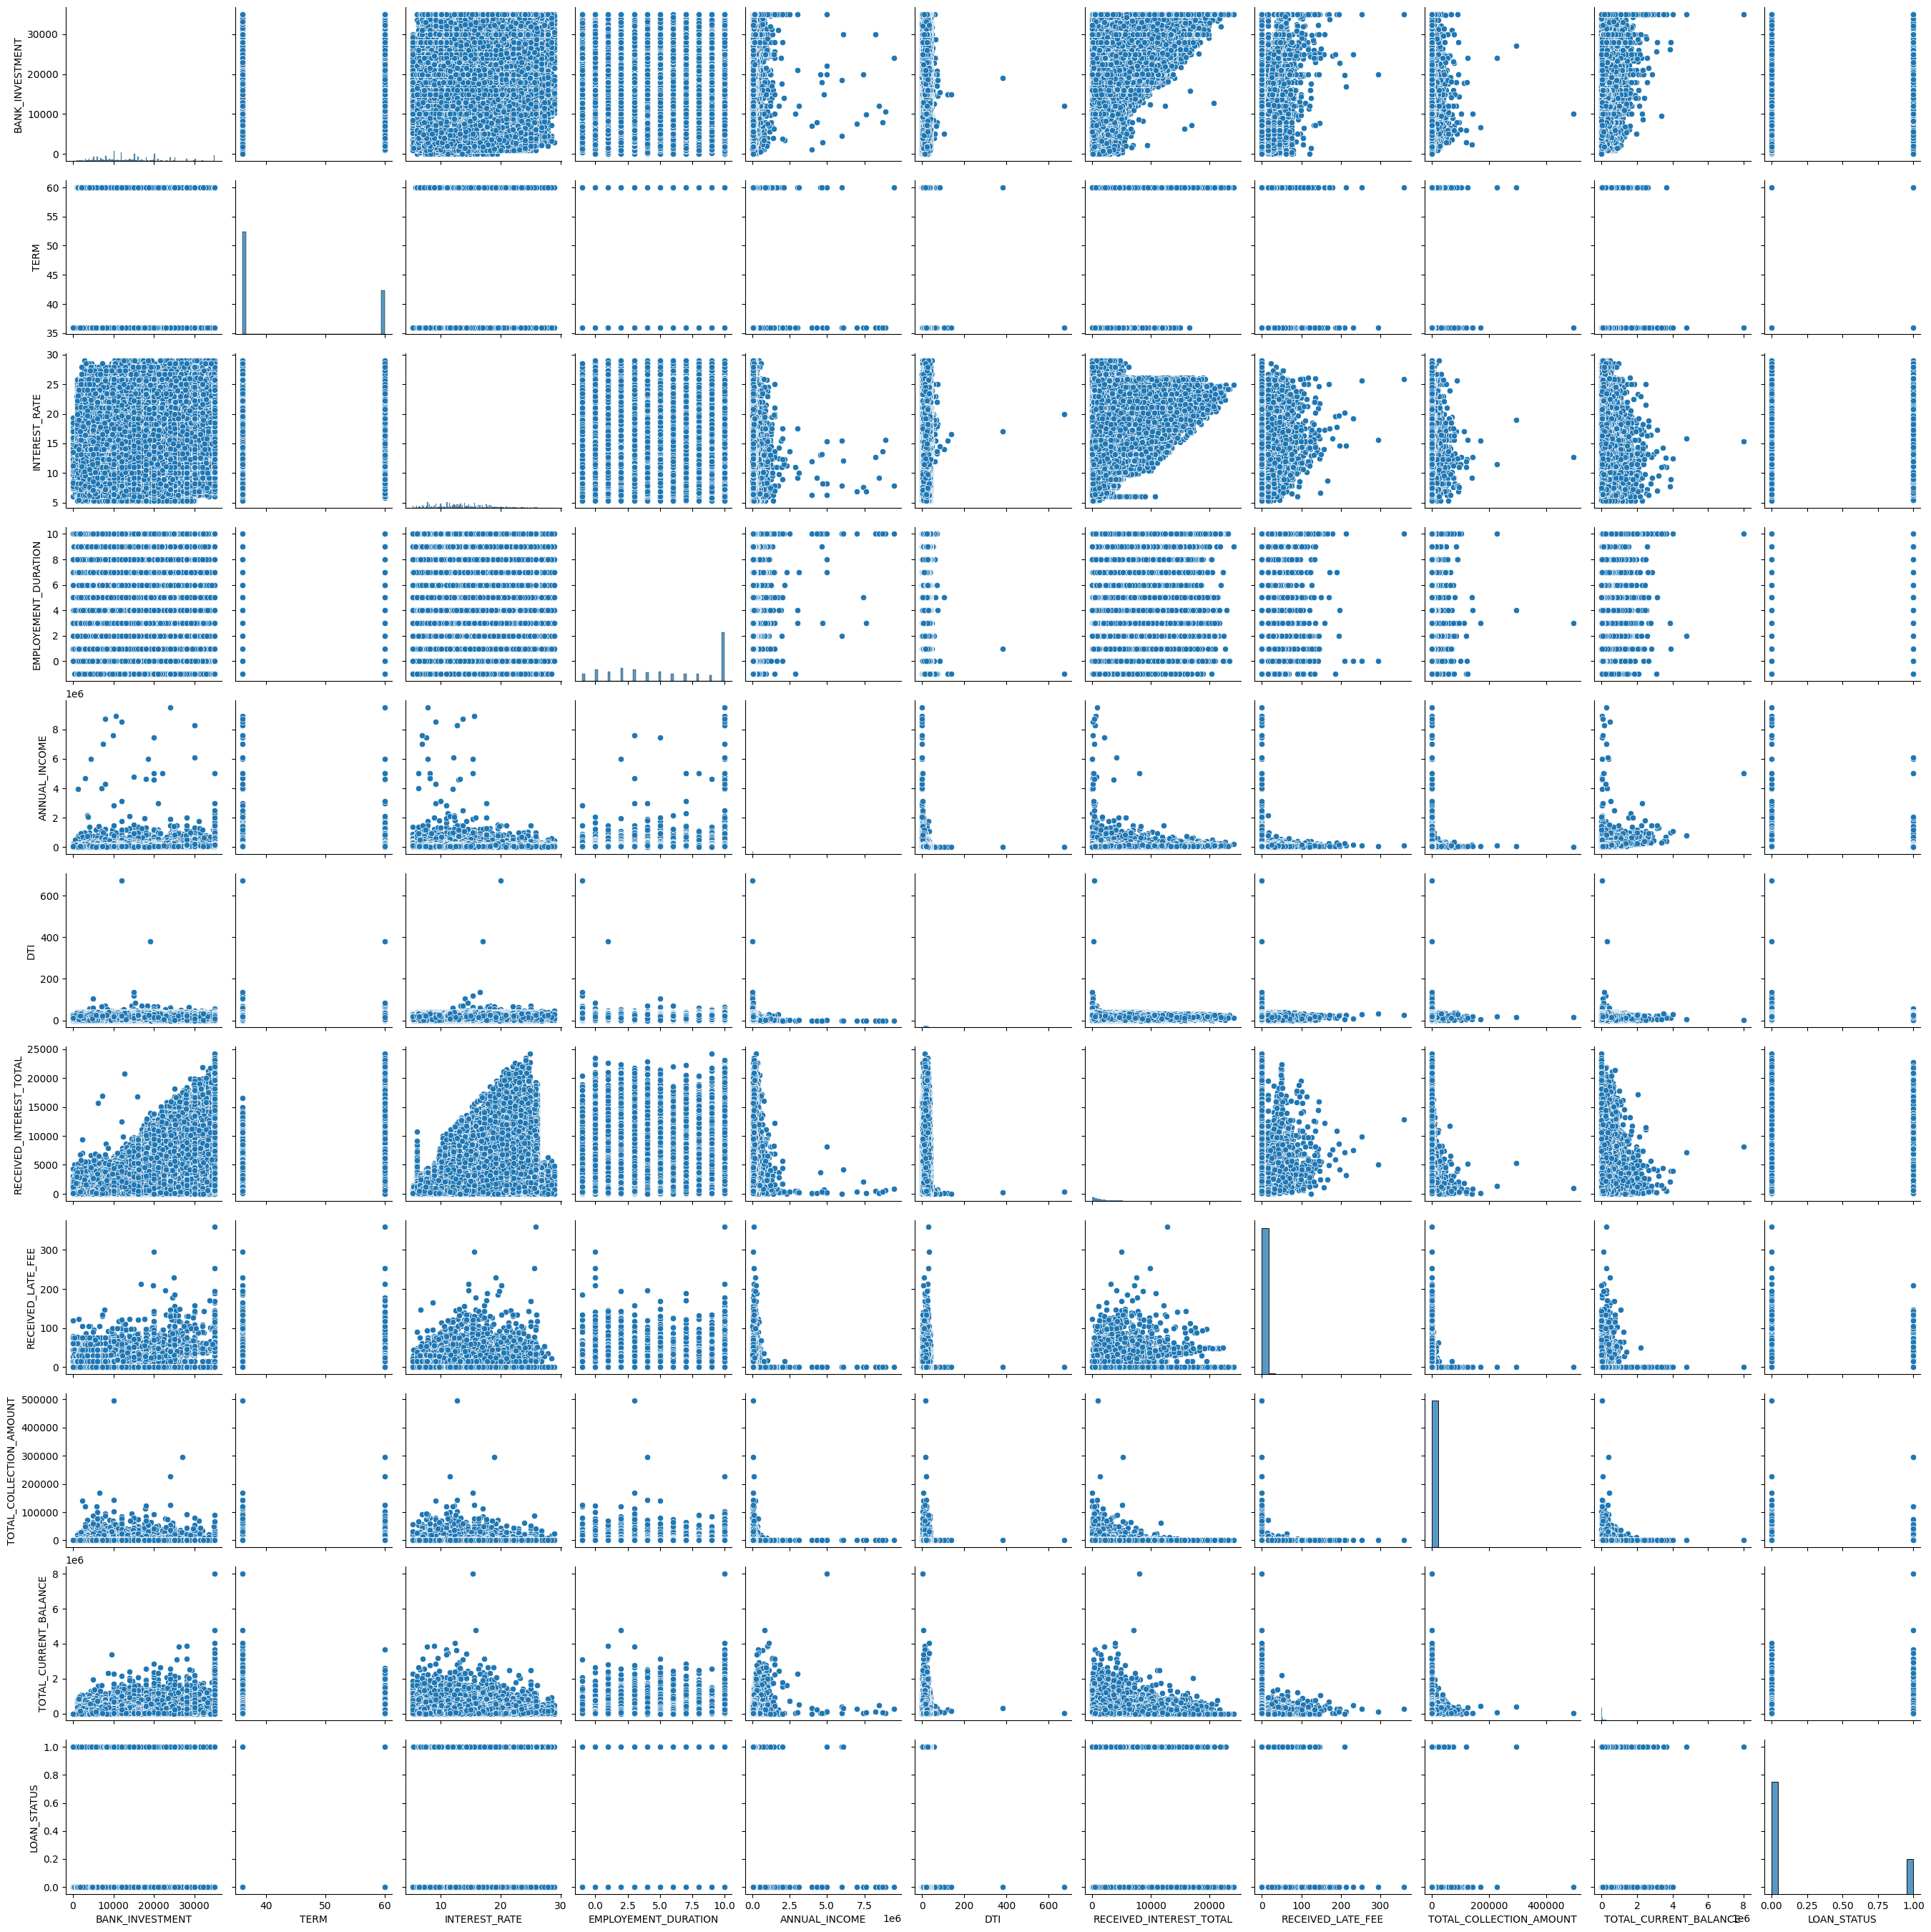

In [167]:
# create pair plot using numerical columns

sns.pairplot(data[numerical_columns])

In [168]:
categorical_columns,numerical_columns

(['STATUS',
  'LOAN_PURPOSE',
  'STATE',
  'INITIAL_LIST_STATUS',
  'APPLICATION_TYPE'],
 ['BANK_INVESTMENT',
  'TERM',
  'INTEREST_RATE',
  'EMPLOYEMENT_DURATION',
  'ANNUAL_INCOME',
  'DTI',
  'RECEIVED_INTEREST_TOTAL',
  'RECEIVED_LATE_FEE',
  'TOTAL_COLLECTION_AMOUNT',
  'TOTAL_CURRENT_BALANCE',
  'LOAN_STATUS'])

/tmp/ipython-input-3214017525.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=0)
/tmp/ipython-input-3214017525.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-3214017525.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')


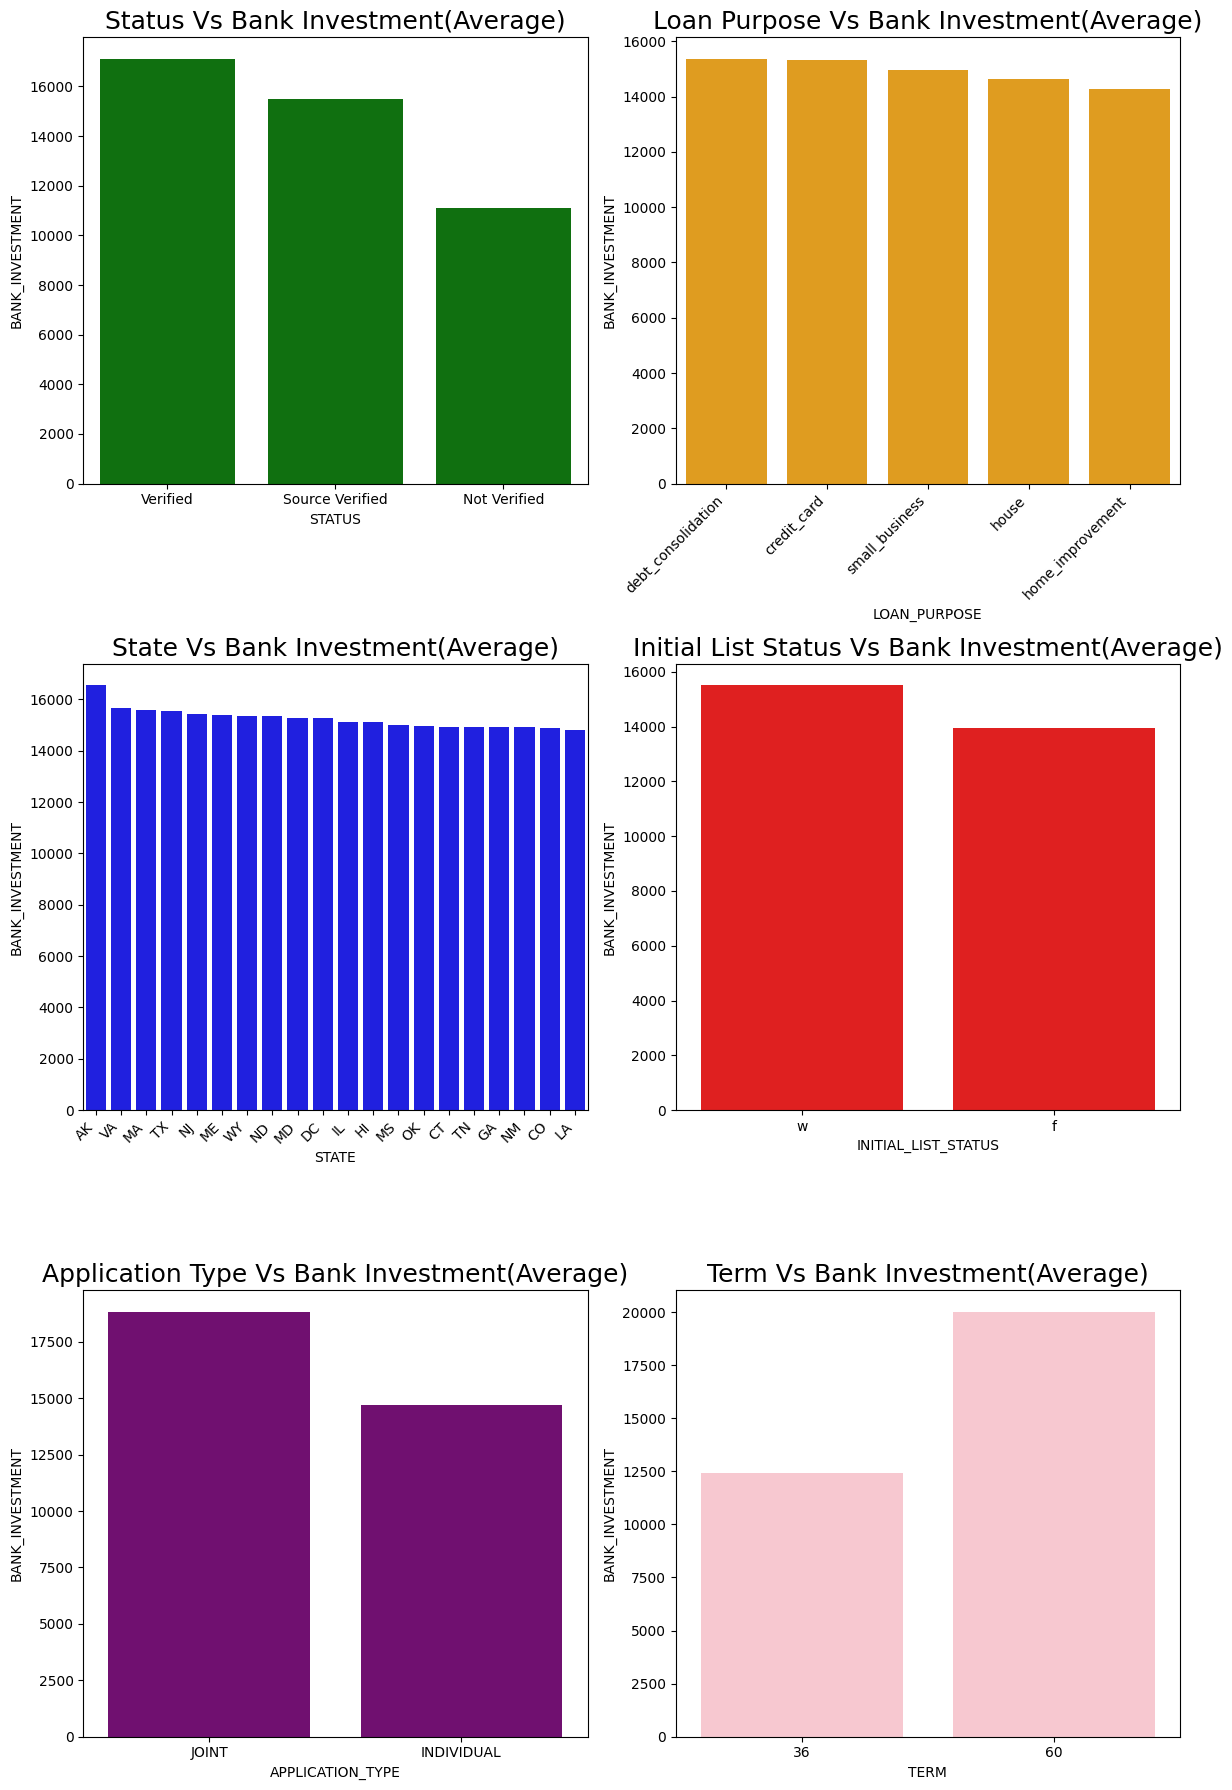

In [169]:
# Bivariate analysis for numerical and categorical variables

fig,axes=plt.subplots(3,2,figsize=(12,18))

status_bank_investment_mean = data.groupby("STATUS")['BANK_INVESTMENT'].mean().sort_values(ascending=False).reset_index()
sns.barplot(ax=axes[0,0], x='STATUS', y='BANK_INVESTMENT', data=status_bank_investment_mean, color="green")

axes[0][0].set_title("Status Vs Bank Investment(Average)", fontsize=18)
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=0)

# Add remaining barplots for other categorical columns
loan_purpose_bank_investment_mean = data.groupby("LOAN_PURPOSE")['BANK_INVESTMENT'].mean().sort_values(ascending=False).reset_index()
sns.barplot(ax=axes[0,1], x='LOAN_PURPOSE', y='BANK_INVESTMENT', data=loan_purpose_bank_investment_mean.head(), color="orange")
axes[0][1].set_title("Loan Purpose Vs Bank Investment(Average)", fontsize=18)
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')

state_bank_investment_mean = data.groupby("STATE")['BANK_INVESTMENT'].mean().sort_values(ascending=False).reset_index()
sns.barplot(ax=axes[1,0], x='STATE', y='BANK_INVESTMENT', data=state_bank_investment_mean.head(20), color="blue")
axes[1][0].set_title("State Vs Bank Investment(Average)", fontsize=18)
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')

initial_list_status_bank_investment_mean = data.groupby("INITIAL_LIST_STATUS")['BANK_INVESTMENT'].mean().sort_values(ascending=False).reset_index()
sns.barplot(ax=axes[1,1], x='INITIAL_LIST_STATUS', y='BANK_INVESTMENT', data=initial_list_status_bank_investment_mean, color="red")
axes[1][1].set_title("Initial List Status Vs Bank Investment(Average)", fontsize=18)

application_type_bank_investment_mean = data.groupby("APPLICATION_TYPE")['BANK_INVESTMENT'].mean().sort_values(ascending=False).reset_index()
sns.barplot(ax=axes[2,0], x='APPLICATION_TYPE', y='BANK_INVESTMENT', data=application_type_bank_investment_mean, color="purple")
axes[2][0].set_title("Application Type Vs Bank Investment(Average)", fontsize=18)

term_bank_investment_mean = data.groupby("TERM")["BANK_INVESTMENT"].mean().sort_values(ascending=False).reset_index()
sns.barplot(ax=axes[2,1], x='TERM', y='BANK_INVESTMENT', data=term_bank_investment_mean, color="pink")
axes[2][1].set_title("Term Vs Bank Investment(Average)", fontsize=18)

plt.tight_layout()
plt.show()

In [170]:

status_bank_investment_mean = data.groupby("STATUS")['BANK_INVESTMENT'].mean().sort_values(ascending=False).reset_index()
status_bank_investment_mean

,STATUS,BANK_INVESTMENT
0,Verified,17122.955401
1,Source Verified,15488.985530
2,Not Verified,11095.122194


# Observation :-

### * Bank invested a significant amount of loan with not verified source.

### * Debt consolidation, credit cards, small businesses and houses all have an average loan of more than 15000.

### * Bank invested more in those who have joint account than individual and term of 60 months were more common than 36 months.

# Multivariate Analysis :-

### * Multivariate analysis in EDA refers to the study of relationships between multipls variable in the dataset.

### * It involves analyzing the interactions and dependencies between different variables and how they collectively impact the outcome.

### * The goal of multivariate analysis is to find out relationships between variables and gain insights that can be used for decision making and problem solving.

### * A heat map is widely used for Multivariate Analysis. Heat map gives the correlation between the variables, whether it has a positive or negative correlations.

<Axes: >

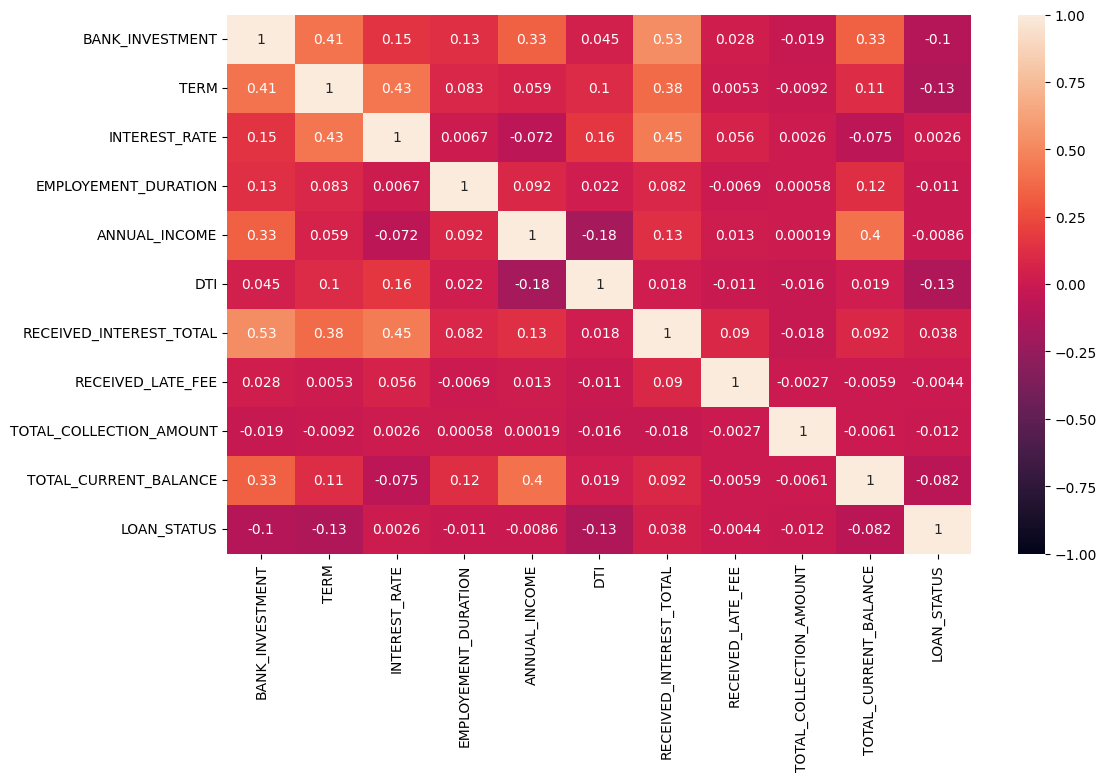

In [171]:
# Heat map

plt.figure(figsize=(12,7))

sns.heatmap(data[numerical_columns].corr(),annot=True,vmin=-1,vmax=1)

In [172]:
data[numerical_columns].corr()

,BANK_INVESTMENT,TERM,INTEREST_RATE,EMPLOYEMENT_DURATION,ANNUAL_INCOME,DTI,RECEIVED_INTEREST_TOTAL,RECEIVED_LATE_FEE,TOTAL_COLLECTION_AMOUNT,TOTAL_CURRENT_BALANCE,LOAN_STATUS
BANK_INVESTMENT,1.000000,0.411672,0.145251,0.126807,0.329500,0.044952,0.529116,0.027770,-0.019192,0.333937,-0.101877
TERM,0.411672,1.000000,0.427560,0.082910,0.058750,0.104824,0.381977,0.005276,-0.009171,0.113627,-0.130959
INTEREST_RATE,0.145251,0.427560,1.000000,0.006672,-0.072053,0.163206,0.445634,0.056141,0.002648,-0.074599,0.002590
EMPLOYEMENT_DURATION,0.126807,0.082910,0.006672,1.000000,0.091981,0.022469,0.082122,-0.006853,0.000584,0.120586,-0.010866
ANNUAL_INCOME,0.329500,0.058750,-0.072053,0.091981,1.000000,-0.175851,0.127485,0.013255,0.000192,0.400595,-0.008608
DTI,0.044952,0.104824,0.163206,0.022469,-0.175851,1.000000,0.018475,-0.011336,-0.015805,0.019115,-0.134020
RECEIVED_INTEREST_TOTAL,0.529116,0.381977,0.445634,0.082122,0.127485,0.018475,1.000000,0.089639,-0.017767,0.092481,0.038344
RECEIVED_LATE_FEE,0.027770,0.005276,0.056141,-0.006853,0.013255,-0.011336,0.089639,1.000000,-0.002731,-0.005885,-0.004353
TOTAL_COLLECTION_AMOUNT,-0.019192,-0.009171,0.002648,0.000584,0.000192,-0.015805,-0.017767,-0.002731,1.000000,-0.006073,-0.011635
TOTAL_CURRENT_BALANCE,0.333937,0.113627,-0.074599,0.120586,0.400595,0.019115,0.092481,-0.005885,-0.006073,1.000000,-0.082216


In [173]:
# Create a function to find out outliers in the data

def find_outliers(data,cols):

    Q1 = data[cols].describe()["25%"]
    Q3 = data[cols].describe()["75%"]

    IQR = Q1 - Q3
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR

    outliers = data[(data[cols]<lower_bound) | (data[cols]>upper_bound)]
    return outliers



In [174]:
income_outliers=find_outliers(data,"ANNUAL_INCOME")
income_outliers

,BANK_INVESTMENT,TERM,INTEREST_RATE,EMPLOYEMENT_DURATION,ANNUAL_INCOME,STATUS,LOAN_PURPOSE,STATE,DTI,INITIAL_LIST_STATUS,RECEIVED_INTEREST_TOTAL,RECEIVED_LATE_FEE,APPLICATION_TYPE,TOTAL_COLLECTION_AMOUNT,TOTAL_CURRENT_BALANCE,LOAN_STATUS
0,14350.0,36,19.19,9,28700.0,Source Verified,debt_consolidation,FL,33.88,f,1173.84,0.0,INDIVIDUAL,0.0,28699.0,0
1,4800.0,36,10.99,0,65000.0,Source Verified,home_improvement,MD,3.64,w,83.95,0.0,INDIVIDUAL,0.0,9974.0,0
2,10000.0,36,7.26,2,45000.0,Not Verified,debt_consolidation,OH,18.42,w,56.47,0.0,INDIVIDUAL,65.0,38295.0,0
3,15000.0,36,19.72,10,105000.0,Not Verified,debt_consolidation,VA,14.97,f,4858.62,0.0,INDIVIDUAL,0.0,55564.0,0
4,16000.0,36,10.64,10,52000.0,Verified,credit_card,CA,20.16,w,2296.41,0.0,INDIVIDUAL,0.0,47159.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,20000.0,36,12.49,10,75000.0,Source Verified,debt_consolidation,MI,14.53,f,2595.45,0.0,INDIVIDUAL,0.0,83087.0,0
532424,12000.0,60,14.99,10,59000.0,Not Verified,debt_consolidation,MI,22.97,w,2182.92,0.0,INDIVIDUAL,0.0,227812.0,0
532425,18725.0,60,20.80,8,42504.0,Verified,debt_consolidation,TN,27.27,f,645.32,0.0,INDIVIDUAL,0.0,26010.0,1
532426,21000.0,60,16.29,1,50000.0,Source Verified,credit_card,OH,14.91,w,4619.79,0.0,INDIVIDUAL,0.0,29197.0,0


In [175]:
data.drop(income_outliers.index,inplace=True)

In [176]:
data.shape

(47173, 16)